In [15]:
%matplotlib inline

import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost.sklearn import XGBClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Run all output interactively
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/Users/jonathan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
# Work out our weighted score based on the weightings given by Bruno
def cm_score(cm):
    # true positive(positive = yes): +1.1 
    tp = 1.1 * cm[1, 1] 
    # true negative: +0.1 
    tn = 0.1 * cm[0 ,0]
    # false negative: -0.9 
    fn = -0.9 * cm[1, 0] 
    # false positive: -0.2 
    fp = -0.2 * cm[0, 1] 
    return (tp + tn + fn + fp)/cm.sum()

# Plot a confusion matrix
def plot_cm(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred)
    fig = plt.figure(figsize = (5,5))
    sns.set(font_scale = 1.25)
    sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ',.0f', annot_kws = {'size': 14})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show();

# Model diagnostics
def model_results(y, y_pred, y_pred_proba):
    print(metrics.classification_report(y, y_pred))
    print('Area under ROC:', metrics.roc_auc_score(y, y_pred_proba[:, 1]))
    plot_cm(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    
# Cross-validation model fitting and diagnostics
def model_results_cv(X, y, classifier):
    y_pred = cross_val_predict(classifier, X, y, cv = 10)
    y_pred_proba = cross_val_predict(classifier, X, y, cv = 10, method='predict_proba')
    model_results(y, y_pred, y_pred_proba)

In [10]:
wine = pd.read_csv('/Users/jonathan/Google Drive/Data Science/Projects/wining-and-mining/data/raw/winemag-data-130k-v2.csv', index_col = 0)

In [13]:
wine.head()
wine['excellent+'] = np.where(wine['points'] >= 90, 1, 0)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Preprocess data

In [14]:
y = wine['excellent+']
X = wine.drop('excellent+', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
# Compute word counts
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train['description'])
X_test_vec = vectorizer.transform(X_test['description'])


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

             precision    recall  f1-score   support

          0       0.86      0.82      0.84     60658
          1       0.72      0.78      0.75     36820

avg / total       0.81      0.80      0.81     97478

Area under ROC: 0.882017501387


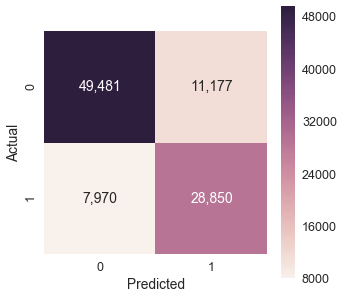

In [30]:
# Fit a naive bayes model to the training data.
nb_classifier = MultinomialNB()
nb.fit(train_features, y_train)

model_results_cv(X_train_vec, y_train, nb_classifier)